In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
food_df= pd.read_csv("data/nndb_flat.csv")

In [6]:
food_df2 = food_df.iloc[:,0:13]
food_df2.head(2)
food_df2 = food_df2.dropna(axis = 'columns', how ='any')


In [7]:
food_df2 =food_df2.dropna(axis = 'columns', how ='any')

In [8]:
food_df3 =food_df2.drop(['FoodGroup','ShortDescrip'], axis =1)
food_df3.head(2)

,ID,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g
0,1001,"Butter, salted",717.0,0.85,81.11,0.06,0.06,0.0
1,1002,"Butter, whipped, with salt",717.0,0.85,81.11,0.06,0.06,0.0


In [17]:
from sklearn.cluster import KMeans


In [18]:
x =food_df3.iloc[:,[2,3,4,5,6,7]].values
x

array([[7.170e+02, 8.500e-01, 8.111e+01, 6.000e-02, 6.000e-02, 0.000e+00],
       [7.170e+02, 8.500e-01, 8.111e+01, 6.000e-02, 6.000e-02, 0.000e+00],
       [8.760e+02, 2.800e-01, 9.948e+01, 0.000e+00, 0.000e+00, 0.000e+00],
       ...,
       [2.690e+02, 0.000e+00, 0.000e+00, 7.314e+01, 7.320e+01, 0.000e+00],
       [9.000e+01, 1.610e+01, 1.400e+00, 2.000e+00, 0.000e+00, 0.000e+00],
       [8.900e+01, 1.980e+01, 5.000e-01, 0.000e+00, 0.000e+00, 0.000e+00]])

In [19]:
des =[]
for i in range(1,11):
    kmeans =KMeans(n_clusters = i,init ='k-means++',max_iter =300,n_init=10,random_state = 0)
    kmeans.fit(x)
    des.append(kmeans.inertia_)

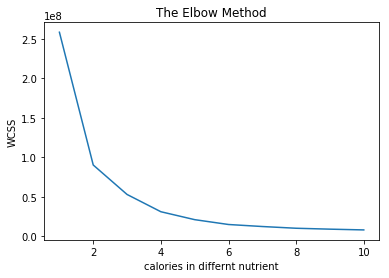

In [20]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('calories in differnt nutrient')
plt.ylabel('WCSS') #DESCRIP
plt.show()

In [28]:
#optimal number of dataset by kmeans
kmeans = KMeans(n_clusters =6,init='k-means++',max_iter =8000
                ,n_init=10,random_state =0)
y_means =kmeans.fit_predict(x)
y_means

array([4, 4, 4, ..., 5, 3, 3], dtype=int32)

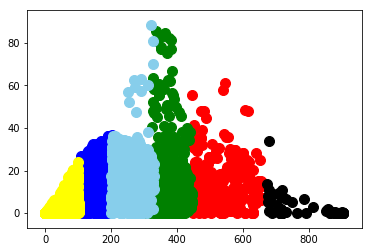

In [29]:
#visualisingcluster
plt.scatter(x[y_means==0, 0],x[y_means==0,1],s =100,c ='red',label ='cluster 1')
plt.scatter(x[y_means==1, 0],x[y_means==1,1],s =100,c ='blue',label ='cluster 2')
plt.scatter(x[y_means==2, 0],x[y_means==2,1],s =100,c ='green',label ='cluster 3')
plt.scatter(x[y_means==3, 0],x[y_means==3,1],s =100,c ='yellow',label ='cluster 4')
plt.scatter(x[y_means==4, 0],x[y_means==4,1],s =100,c ='black',label ='cluster 5')
plt.scatter(x[y_means==5, 0],x[y_means==5,1],s =100,c ='skyblue',label ='cluster 6')


Text(0, 0.5, 'des')

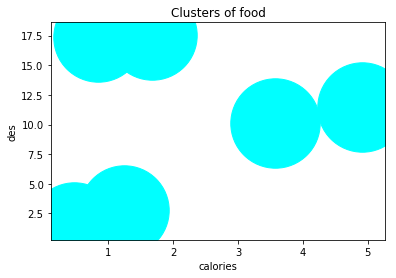

In [37]:
plt.scatter(kmeans.cluster_centers_[:,5], kmeans.cluster_centers_[:,1],s = 8000, c='cyan',label='Centroids')
plt.title('Clusters of food')
plt.xlabel('calories')
plt.ylabel('des')
